# *EXPLORATORY DATA ANALYTICS* on survival prediction in Titanic!


-
### A notebook by **Rajkumar Lakshmanamoorthy** ([https://www.kaggle.com/rajkumarl](http://))
### using Dataset: [https://www.kaggle.com/c/titanic/data](http://)


# Step 1: Data extracting

In [1]:
import numpy as np 
import pandas as pd
pd.plotting.register_matplotlib_converters()
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
np.random.seed(7)


# reading data into dataframe - train dataset, test dataset
train = pd.read_csv('/kaggle/input/titanic/train.csv', index_col='PassengerId')
test = pd.read_csv('/kaggle/input/titanic/test.csv', index_col='PassengerId')


In [2]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.shape, test.shape

((891, 11), (418, 10))

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


### `Survived` column is the target. And the remaining 10 columns form features. Out of 10, 5 are objects data type. Remaining are numericals.

# Step 2: Data Preprocessing

In [5]:
# missing values in the train dataset

data_na = train.isna().sum()
data_na[data_na>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

### Out of 10 features in train data, 3 have missing values. `Cabin` leads the list with more than half of its data missing (687/891). `Age` has 177 missing values, quite a number. `Embarked` column has only 2 missing values.

In [6]:
# missing values in test dataset

test_na = test.isna().sum()
test_na[test_na>0]

Age       86
Fare       1
Cabin    327
dtype: int64

### Similar to train dataset, column `Cabin` has a huge missing values (327/418) in the test dataset. `Age` has considerable number of missing data (86/418). And `Fare` has one missing value, an odd thing compared to train dataset.

### Since feature `Cabin` has enormous number of missing values, the column can be dropped from both train and test datasets. By intuition, it can be said that `Age` is one of the important parameters which decide the survival rate. So `Age` column cannot be dropped at all. On the other hand, filling them with anonymous values may lead to noise in data. 


### By observing the data, it can be concluded that the `Name` of passenger and `Ticket` Number could not have any effect on survival. Hence we can simply drop those two columns from the datasets.

In [7]:
train.drop(['Name','Cabin','Ticket'], axis=1, inplace=True)
test.drop(['Name', 'Cabin', 'Ticket'], axis=1, inplace=True)

### `Age` feature has a quite good number of missing values in both train and test dataset.
### Observing the `Age` feature through visualizations to get an idea how it is distributed and correlated!

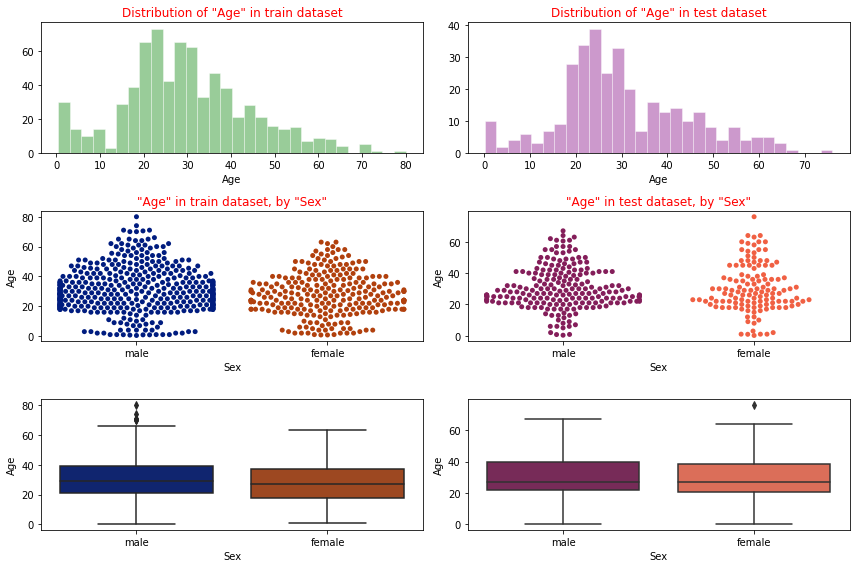

In [8]:
fig, ((ax1, ax2),(ax3, ax4),(ax5, ax6)) = plt.subplots(3,2, figsize=(12,8))
sns.set_style("darkgrid")
sns.distplot(train['Age'], color = 'green', kde=False, bins=30, ax=ax1)
sns.distplot(test['Age'], color = 'purple', kde=False, bins=30, ax=ax2)
sns.swarmplot(train['Sex'], train['Age'], palette='dark', ax=ax3)
sns.swarmplot(test['Sex'], test['Age'], palette ='rocket', ax=ax4)
sns.boxplot(train['Sex'], train['Age'], palette='dark', ax=ax5)
sns.boxplot(test['Sex'], test['Age'], palette ='rocket', ax=ax6)
ax1.set_title('Distribution of "Age" in train dataset', color='red')
ax2.set_title('Distribution of "Age" in test dataset', color='red')
ax3.set_title('"Age" in train dataset, by "Sex"', color='red')
ax4.set_title('"Age" in test dataset, by "Sex"', color='red')
plt.tight_layout()
plt.show()


## **Insight:** 
### `Age` follows some remarkable distribution in both train set and test set. And by intuition, it can be expressed that `Age` plays a major role in the rate of survival. The pattern of distribution of `Age` and its correlation with other features can yield a good solution to impute its missing values.

In [9]:
# Concatenate train and test set to optimally fill missing values
df = pd.concat([train, test],sort=True).reset_index(drop=True)
df.index = df.index+1

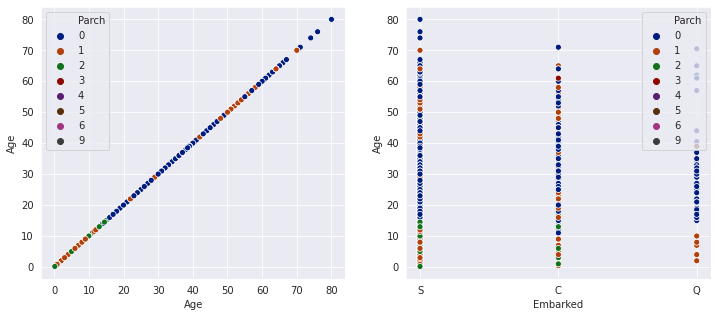

<Figure size 432x288 with 0 Axes>

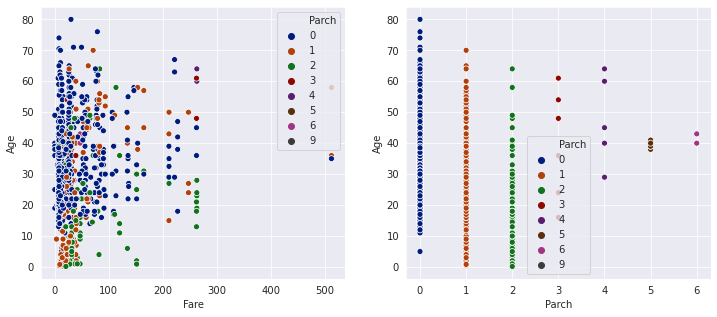

<Figure size 432x288 with 0 Axes>

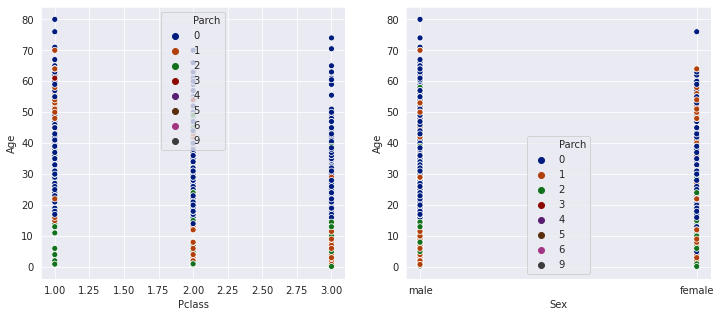

<Figure size 432x288 with 0 Axes>

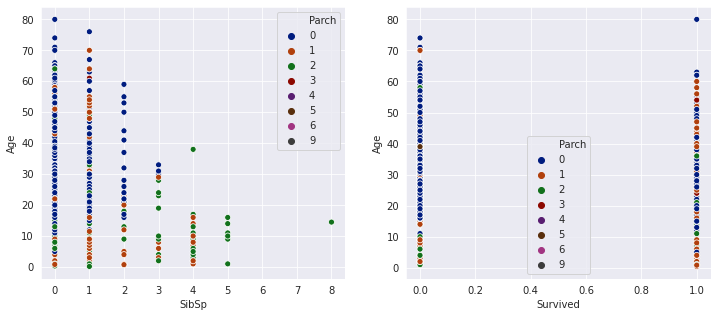

<Figure size 432x288 with 0 Axes>

In [10]:

for i, x in enumerate(df.columns):
    if (i%2 == 0):
        f,ax = plt.subplots(1,2, figsize=(12,5))
        sns.set_style('darkgrid')
        plt.figure(figsize=(6,4))
    sns.scatterplot(df[x], df['Age'], hue=df['Parch'], palette='dark', ax=ax[i%2])
    ax[i%2].set_ylabel('Age')
    ax[i%2].set_xlabel(str(x))
    if (i%2 == 1):
        plt.show()


## **Insight:**
### From the plots above, we can easily understand that `Age` has good correlation with features `SibSp` and `Parch`. It also has a moderate correlation with `Embarked` feature. And other features fail to exhibit significant correlation with `Age`. Hence by inter-plotting these 3 features `Age`, `SibSp` and `Parch` we surely can generate an idea of how to impute the missing values of `Age`.

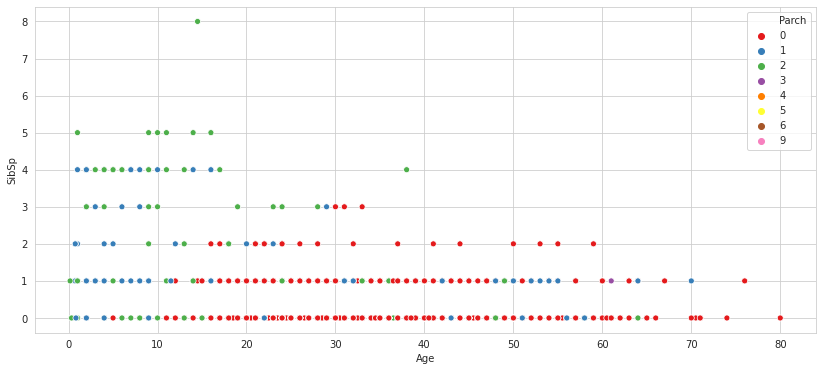

In [11]:
sns.set_style('whitegrid')
plt.figure(figsize=(14,6))
sns.scatterplot(y=df['SibSp'], x=df['Age'], hue=df['Parch'], palette='Set1')
plt.legend()
plt.show()

### Visualizations are always great in Data Analytics! With this plot, few insights from visual observations can be stated as:
### 1. If a traveller has 4 or 5 Sibling/Spouse count, her/his `Age` is confined within 1 to 18.
### 2. If a traveller has 1 or 2 Parent/Children count and 2 or 3 Sibling/Spouse count, her/his `Age` is less than 25
### 3. Most importantly, if Parent/Children count increases, then Sibling/Spouse count decreses but `Age` increases.

### With these observations, we can group data according to these critical features and take a statistically significant decision on imputing value of `Age`

In [12]:
df_new = df.groupby(['Parch','SibSp']).Age.describe().reset_index()

print('*'*75,'\nStatistical Insight on feature "Age"\n',  df.groupby(['Parch','SibSp']).Age.describe())


*************************************************************************** 
Statistical Insight on feature "Age"
              count       mean        std    min    25%   50%    75%   max
Parch SibSp                                                              
0     0      590.0  31.511864  12.250562   5.00  22.00  29.0  38.00  80.0
      1      155.0  33.758065  12.920506  12.00  24.00  30.0  42.50  76.0
      2       20.0  31.700000  13.830173  16.00  21.75  25.0  41.75  59.0
      3        3.0  31.333333   1.527525  30.00  30.50  31.0  32.00  33.0
1     0       51.0  29.593137  17.499385   0.42  17.50  25.0  44.00  65.0
      1       85.0  26.773529  18.686031   0.67   9.00  27.0  40.00  70.0
      2        9.0  10.055556   9.887475   0.75   1.00   5.0  20.00  24.0
      3        5.0   9.600000  11.104053   2.00   3.00   6.0   8.00  29.0
      4       10.0   7.100000   5.108816   1.00   2.50   7.0   9.50  16.0
2     0       39.0  23.363077  16.372953   0.33   8.50  24.0  36.00  64

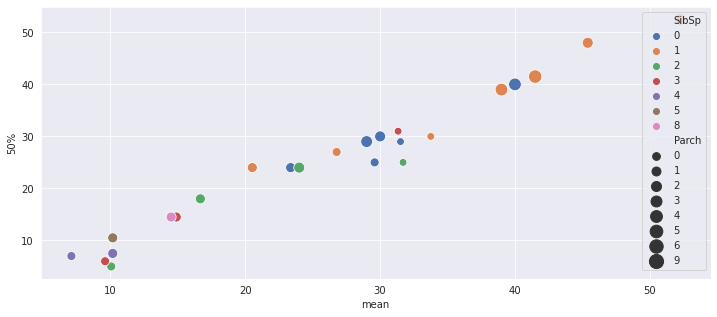

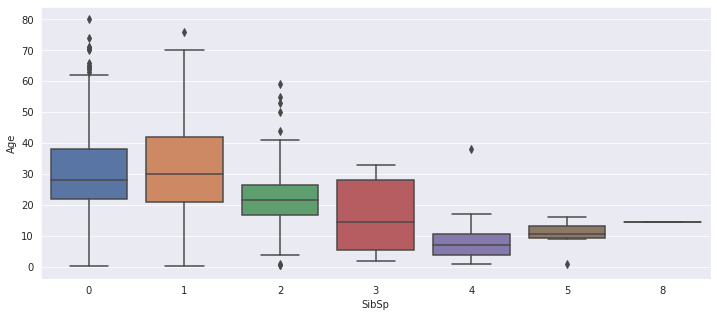

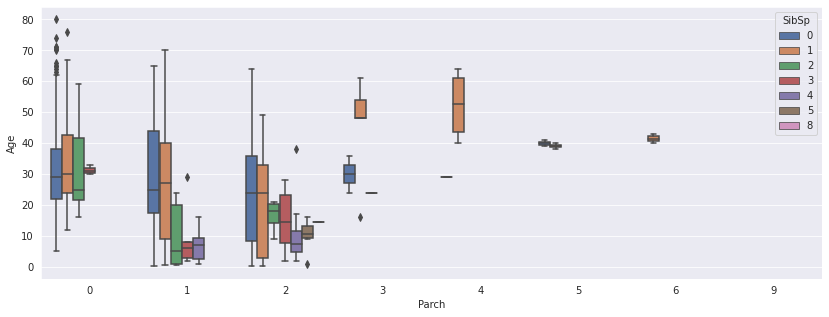

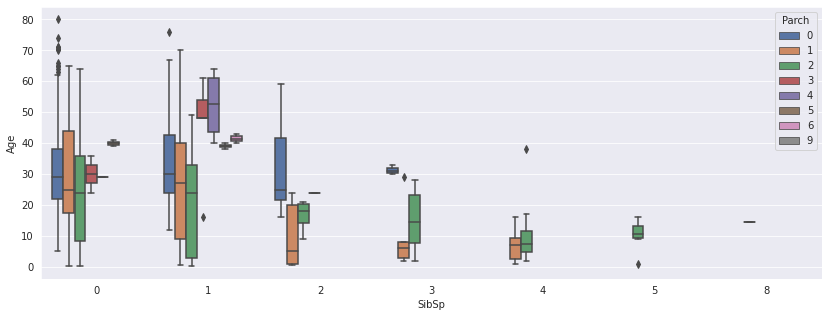

In [13]:
sns.set_style('darkgrid')
i=list(np.arange(60,220,20))
plt.figure(figsize=(12,5))
sns.scatterplot(x=df_new['mean'], y=df_new['50%'], hue=df_new['SibSp'], size=df_new['Parch'], sizes=i, palette='deep')
plt.show()
#
plt.figure(figsize=(12,5))
sns.boxplot(y=df['Age'], x=df['SibSp'], palette='deep')
plt.show()
#
plt.figure(figsize=(14,5))
sns.boxplot(y=df['Age'], x=df['Parch'], hue=df['SibSp'], palette='deep')
plt.show()
#
plt.figure(figsize=(14,5))
sns.boxplot(y=df['Age'], hue=df['Parch'], x=df['SibSp'], palette='deep')
plt.show()

## Statistical Insights on `Age` feature

* ### Above table has grouped the entire train data set primarily based on counts of Parent/Children and secondarily based on counts of Sibling/Spouse. Statistical details such as count of entries, mean, median(50%), quartiles (25% and 75%), standard deviation, minimum and maximum values of entires are presented as grouped.

* ### Mean and median values are strongly correlated and are close to each other is almost every category.

* ### As the count of either `SibSp` or `Parch` increases, standard deviation is smaller with a low range(= maximum - minimum). The less scatter of values and very low count of values might be the reason. Any decision on such groups may become unreliable than it seems.

* ### For most of the groups, standard deviation is a low value. Hence it is advisable that missing values of `Age` can be filled with *mean* value of corresponding group.

In [14]:
df.columns

Index(['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp',
       'Survived'],
      dtype='object')

In [15]:
# Fill missing values

for i in ['Age', 'Fare']:
    df[i] = df.groupby(['Parch', 'SibSp'])[i].apply(lambda x: x.fillna(x.median()))
    df[i] = df.groupby(['SibSp'])[i].apply(lambda x: x.fillna(x.median()))          # to fill missing which cannot be grouped by Parch
df['Embarked'] = df.groupby(['SibSp'])['Embarked'].apply(lambda x: x.fillna(x.value_counts().index[0]))    # fill with modal value


In [16]:
# Split train and test data as original
train = df.loc[:891]
test = df.loc[892:].drop('Survived', axis=1)

In [17]:
train.shape, test.shape

((891, 8), (418, 7))

In [18]:
train.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0)

# Step 3: Feature Engineering

In [19]:
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder
from sklearn.feature_selection import SelectKBest, f_classif

# Split train data into feature data X and target data y
X = train.drop(['Survived'], axis=1)
y = train['Survived']

# Get 20% of validation data from train set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)
X_train.Age.astype('float64')

141    24.0
440    31.0
818    31.0
379    20.0
492    21.0
       ... 
836    39.0
193    19.0
630    29.0
560    36.0
685    60.0
Name: Age, Length: 712, dtype: float64

In [20]:
import itertools
num_col = ['Age', 'Fare']
cat_col = list(set(X.columns)-set(num_col))

# Generate interaction features with categorical columns
for c1, c2 in itertools.combinations(cat_col, 2):
    print(c1,c2)
    name = '_'.join([c1,c2])
    X_train[name] = X_train[c1].map(str)+'_'+X_train[c2].map(str)
    X_valid[name] = X_valid[c1].map(str)+'_'+X_valid[c2].map(str)
    test[name] = test[c1].map(str)+'_'+test[c2].map(str)

print(X_train.columns)
# Encode categorical variables
new_cat_col = [i for i in X_train.columns if X_train[i].dtype != 'float64']

enc = TargetEncoder(cols=new_cat_col)
X_train[new_cat_col] = enc.fit_transform(X_train[new_cat_col], y_train)
X_valid[new_cat_col] = enc.transform(X_valid[new_cat_col])
test[new_cat_col] = enc.transform(test[new_cat_col])


Embarked Sex
Embarked Parch
Embarked Pclass
Embarked SibSp
Sex Parch
Sex Pclass
Sex SibSp
Parch Pclass
Parch SibSp
Pclass SibSp
Index(['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp',
       'Embarked_Sex', 'Embarked_Parch', 'Embarked_Pclass', 'Embarked_SibSp',
       'Sex_Parch', 'Sex_Pclass', 'Sex_SibSp', 'Parch_Pclass', 'Parch_SibSp',
       'Pclass_SibSp'],
      dtype='object')


In [21]:
# Feature Selection
selector = SelectKBest(f_classif, k=15)
X_1 = selector.fit_transform(X_train, y_train)
X_2 = pd.DataFrame(selector.inverse_transform(X_1), index=X_train.index, columns = X_train.columns)
select_col = X_2.columns[X_2.var() != 0]

print(select_col)

Index(['Fare', 'Parch', 'Pclass', 'Sex', 'SibSp', 'Embarked_Sex',
       'Embarked_Parch', 'Embarked_Pclass', 'Embarked_SibSp', 'Sex_Parch',
       'Sex_Pclass', 'Sex_SibSp', 'Parch_Pclass', 'Parch_SibSp',
       'Pclass_SibSp'],
      dtype='object')


# Step 4: Model Validation

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

model = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=0)
model.fit(X_train[select_col], y_train)
prediction = model.predict(X_valid[select_col])

accuracy = accuracy_score(y_valid, prediction)
print('Validation Accuracy :', accuracy)
conf = confusion_matrix(y_valid, prediction)
print('Confusion matrix: ', conf)

Validation Accuracy : 0.8268156424581006
Confusion matrix:  [[99 11]
 [20 49]]


# Step 5: Final Modeling and Prediction

### Concate train set and valid set to model with full data set. And save predictions to output file. 

In [23]:
# predicting test dataset
X_full = pd.concat([X_train,X_valid], sort=True)
y_full = pd.concat([y_train,y_valid], sort=True)
model_full = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=0)
model_full.fit(X_full[select_col], y_full)
final_pred = model_full.predict(test[select_col])
binary = final_pred.astype('int64')
output = pd.DataFrame({'PassengerId':test.index, 'Survived':binary})
output.to_csv('submission.csv', index=False)